# UMI vs Bulk

In [1]:
import os
import sys
from pathlib import Path
from glob import glob

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from larval_gonad.notebook import Nb, Seurat
from larval_gonad.plotting import make_figs
from larval_gonad.config import memory
from larval_gonad.cell_selection import cellranger_counts
from larval_gonad.bulk import read_bulk, TESTIS_BULK, plot_bulk_pairwise_corr, scRNAseq_corr_distribution, plot_corr_distribution

# Setup notebook
nbconfig = Nb.setup_notebook()

last updated: 2018-03-27 
Git hash: 8e5baaa1d556c374e92dae08012a51b9e18d4c4a


In [2]:
mpl.style.use(['common', 'notebook'])

In [3]:
# Get single cell data ready
t1 = Seurat('../output/testis1')
umi1 = pd.read_parquet('../output/testis1/larval_umi.parquet').sort_values('umi_count', ascending=False)
raw1 = cellranger_counts('../output/testis1/outs/raw_gene_bc_matrices_h5.h5')

t2 = Seurat('../output/testis2')
umi2 = pd.read_parquet('../output/testis2/larval_umi.parquet').sort_values('umi_count', ascending=False)
raw2 = cellranger_counts('../output/testis2/outs/raw_gene_bc_matrices_h5.h5')

t3 = Seurat('../output/testis3')
umi3 = pd.read_parquet('../output/testis3/larval_umi.parquet').sort_values('umi_count', ascending=False)
raw3 = cellranger_counts('../output/testis3/outs/raw_gene_bc_matrices_h5.h5')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


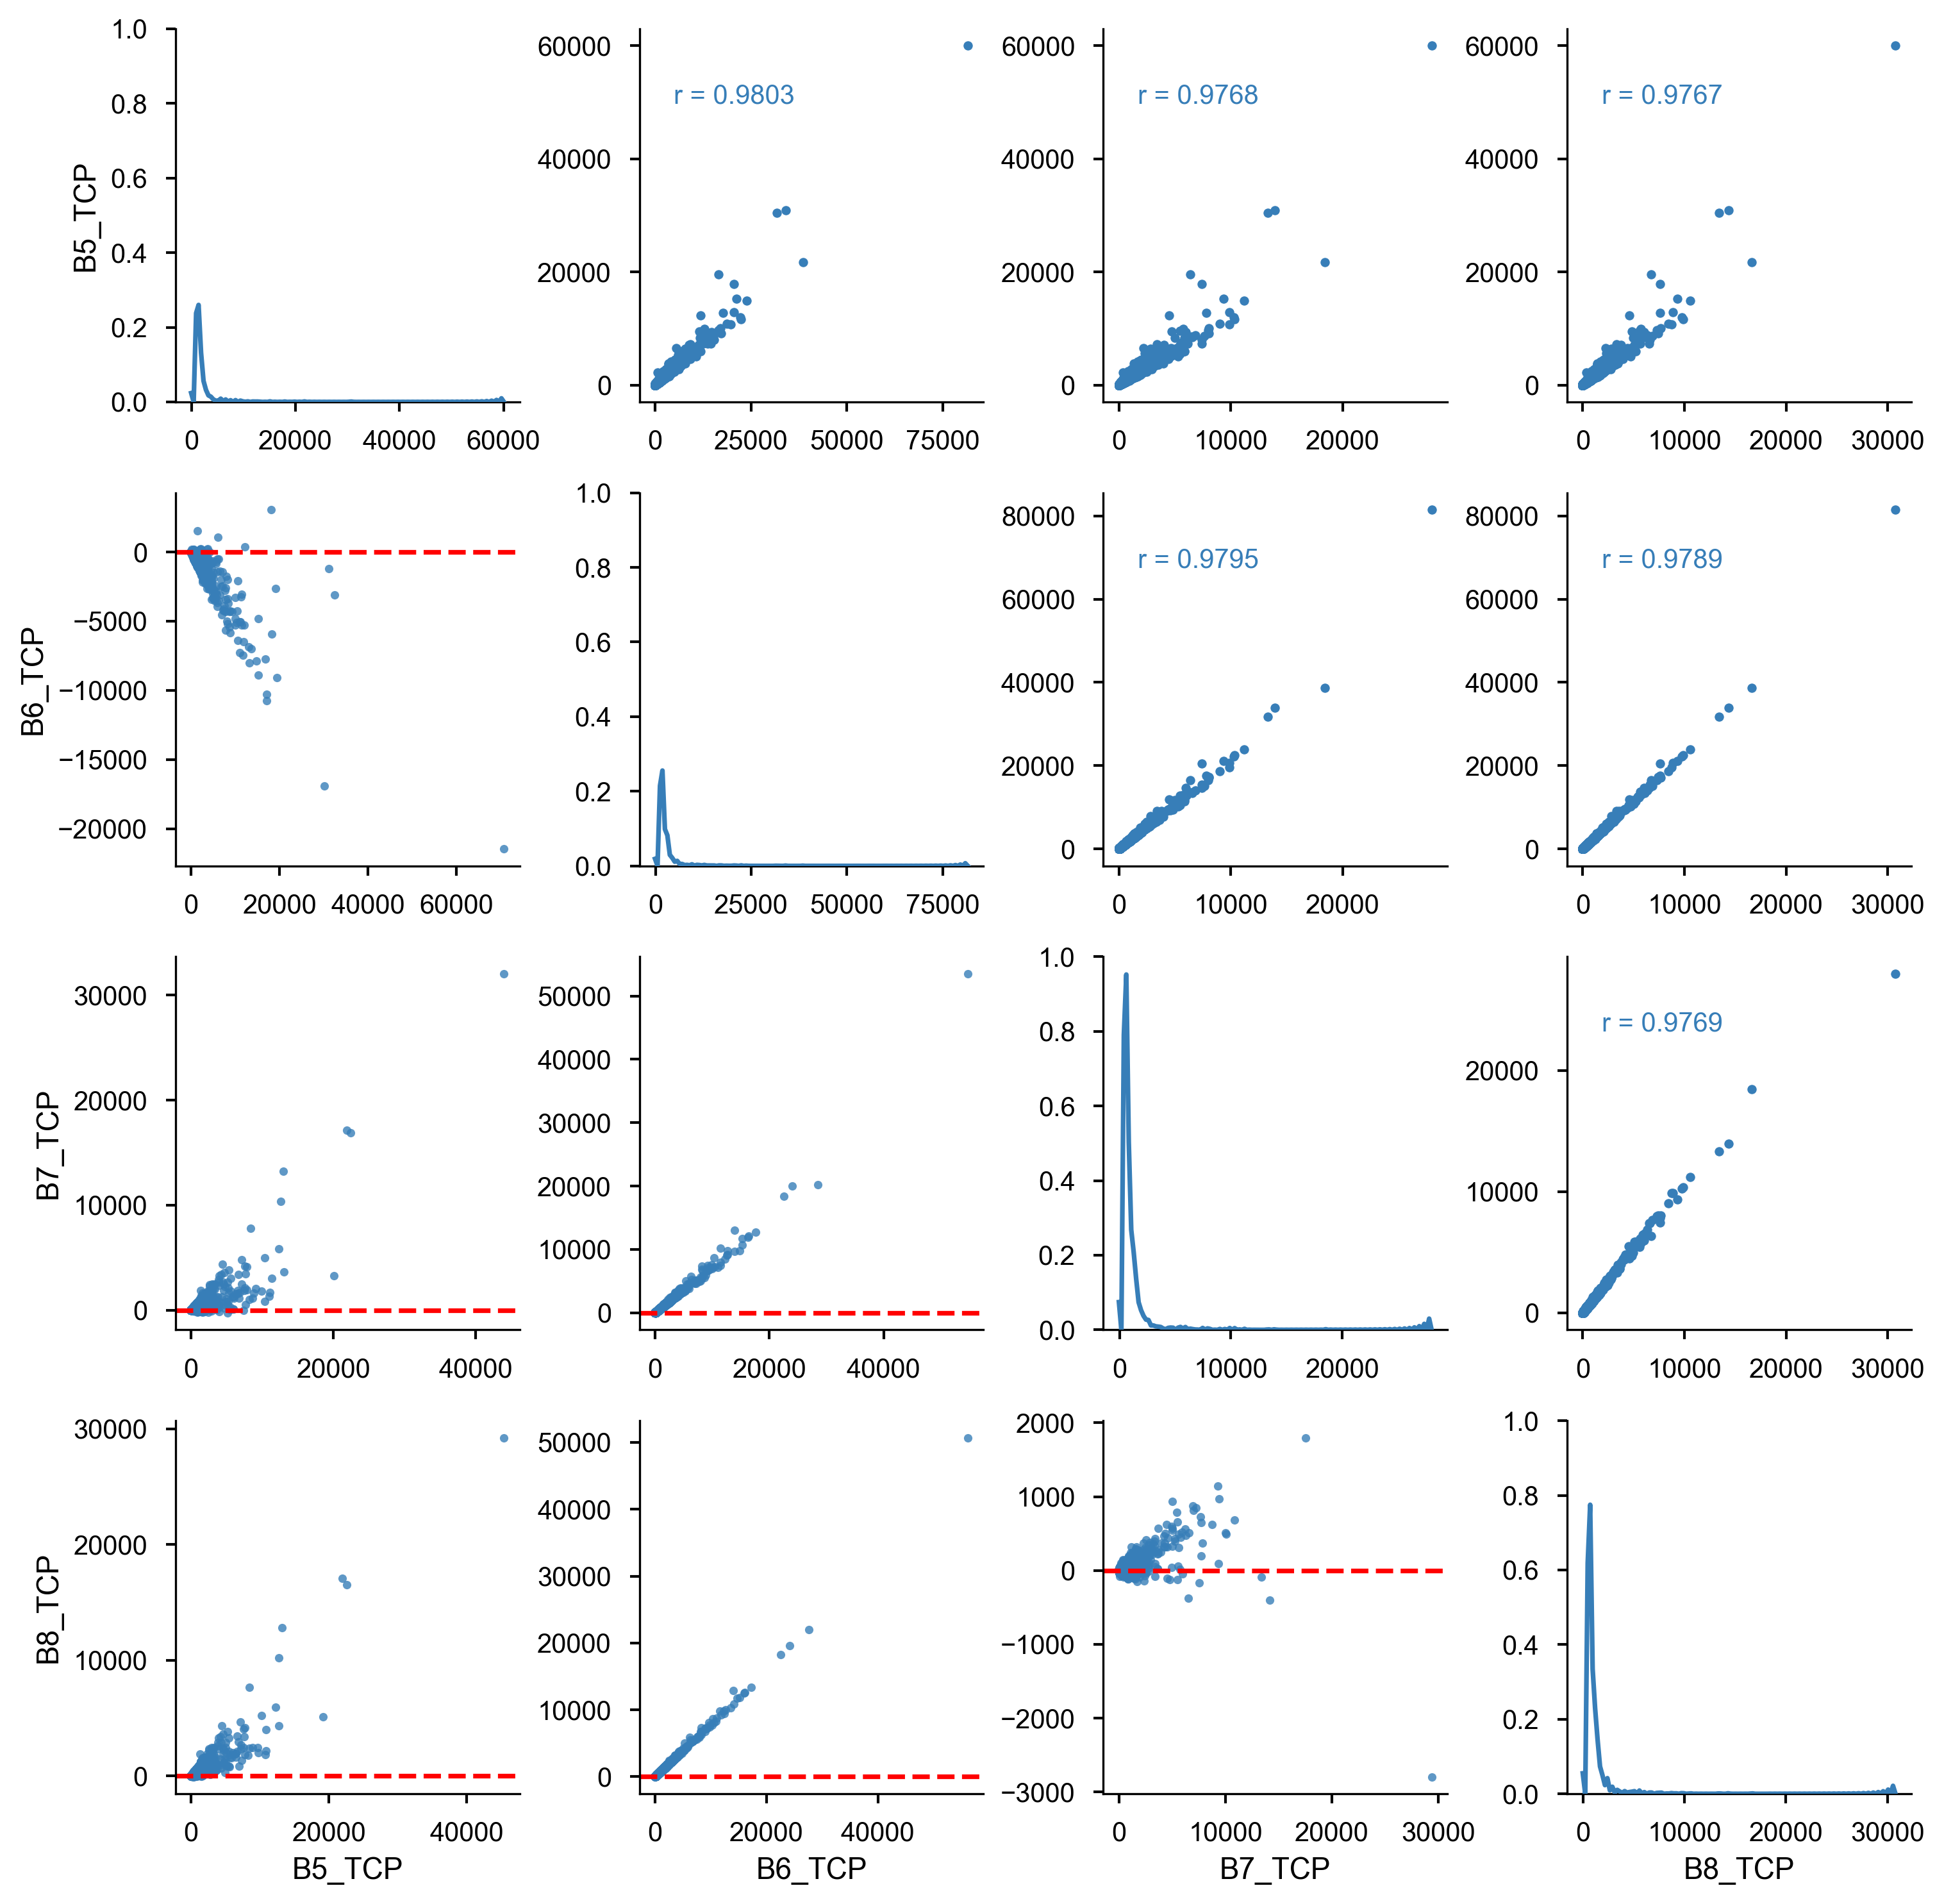

In [4]:
# Import testis bulk data.
bulk_dat = read_bulk('../bulk-rnaseq-wf/data/rnaseq_samples', filter=TESTIS_BULK)
plot_bulk_pairwise_corr(bulk_dat, corrfunc_kws={'loc': (0.1, .8)})

In [ ]:
corr1 = scRNAseq_corr_distribution(umi1, raw1, bulk_dat)
corr2 = scRNAseq_corr_distribution(umi2, raw2, bulk_dat)
corr3 = scRNAseq_corr_distribution(umi3, raw3, bulk_dat)

In [ ]:
plot_corr_distribution(corr1)
plt.suptitle('Testis 1 scRNA-Seq--Bulk Correlations')
plt.tight_layout(rect=[0, 0, 1, .95])

In [ ]:
plot_corr_distribution(corr2)
plt.suptitle('Testis 2 scRNA-Seq--Bulk Correlations')
plt.tight_layout(rect=[0, 0, 1, .95])

In [ ]:
plot_corr_distribution(corr3)
plt.suptitle('Testis 3 scRNA-Seq--Bulk Correlations')
plt.tight_layout(rect=[0, 0, 1, .95])

In [ ]:
corr_summary = pd.concat([corr1.idxmax(), corr2.idxmax(), corr3.idxmax()], axis=1)
corr_summary.columns = ['Testis1', 'Testis 2', 'Testis 3']

In [ ]:
corr_summary